In [1]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
digits = load_digits()

In [29]:
dig_data = digits.data
dig_data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [19]:
dig_df = pd.DataFrame(dig_data)

In [23]:
dig_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [24]:
kmeans = KMeans(n_clusters=10)

In [30]:
cluster_codes = kmeans.fit_predict(dig_df)
cluster_codes

array([4, 6, 6, ..., 6, 9, 9])

In [44]:
cluster_series = pd.Series(cluster_codes)
cluster_series.head()

0    4
1    6
2    6
3    9
4    8
dtype: int32

In [45]:
cluster_series.value_counts()

9    404
6    223
0    183
1    181
4    179
8    165
3    152
7    118
2    103
5     89
dtype: int64

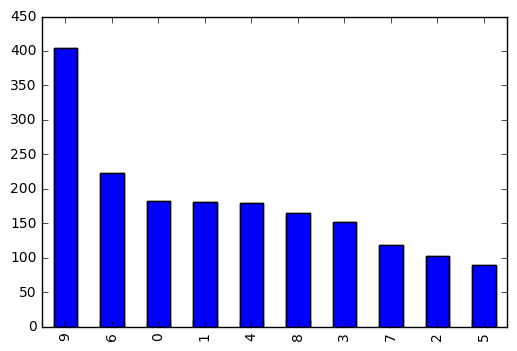

In [49]:
cluster_series.value_counts().plot(kind='bar')
plt.show()

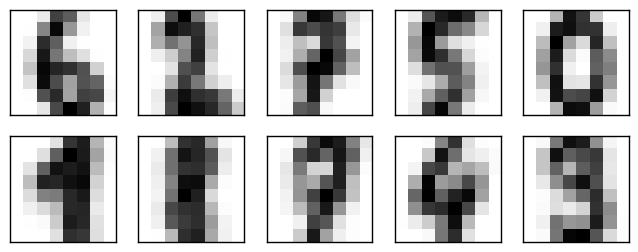

In [52]:
fig, axes = plt.subplots(2,5,figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)
for ax, center in zip(axes.flat, centers):
    ax.set(xticks=[], yticks=[])
    ax.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()